# Catalog Tools: How To

<div class="alert alert-block alert-info">
    
#### In this notebook we will show how to:

<ol>
    <li>Download catalogs</li>
    <li>Plot the seismicity</li>
    <li>Generate synthetic earthquakes</li>
    <li>Bin magnitudes</li>
    <li>Calculate b-values</li> 
</ol>

## 0. Import general packages
<font color=#208de2> In the main package, the analytic tools are available (b-value estimation), while other funcitons as catalog downloads, general functions and plotting are defined as subpackages. </font>

In [1]:
#%matplotlib widget
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## 1. Download catalog

In [2]:
from catalog_tools.plots.basics import dot_size

In [19]:
# standard
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# for map plotting
from shapely.geometry import Polygon
import cartopy
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas

# typing
from typing import Optional
from typing import List


def plot_in_space(
        cat: pd.DataFrame,
        country: Optional[str] = None,
        resolution: str = '110m',
        colors: Optional[str] = None
) -> cartopy.mpl.geoaxes.GeoAxes:
    """
    function plots
    Args:
        cat: pd.DataFrame
        country: name of country, if None map will fit to data points
        resolution: resolution of map, '10m', '50m' and '110m' available

    Returns:
        GeoAxis object
    """
    # request data for use by geopandas
    category: str = 'cultural'
    name: str = 'admin_0_countries'
    print("checkpoint 1")
    shpfilename = shapereader.natural_earth(resolution, category, name)
    print("checkpoint 2")
    df = geopandas.read_file(shpfilename)

    print("checkpoint 3")
    if colors is not None:
        stamen_terrain = cimgt.Stamen('terrain-background',
                                      desired_tile_form="L")
    else:
        stamen_terrain = cimgt.Stamen('terrain-background')

    # projections that involved
    print("checkpoint 4")
    st_proj = stamen_terrain.crs  # projection used by Stamen images
    ll_proj = ccrs.PlateCarree()  # CRS for raw long/lat

    ax = plt.subplot(projection=st_proj)
    print("checkpoint 5")

    if country is not None:
        print("checkpoint 6")
        # create box around country
        poly = [df.loc[df['ADMIN'] == country]['geometry'].values[0]]
        pad_lat = abs(poly[0].bounds[0] - poly[0].bounds[2]) * 0.05
        pad_lon = abs(poly[0].bounds[1] - poly[0].bounds[3]) * 0.05
        exts = [poly[0].bounds[0] - pad_lat, poly[0].bounds[2] + pad_lat,
                poly[0].bounds[1] - pad_lon, poly[0].bounds[3] + pad_lon]
        msk = Polygon(rect_from_bound(*exts)).difference(poly[0].simplify(0.01))
#         msk_stm = st_proj.project_geometry(msk, ll_proj)
        ax.add_geometries(msk, st_proj, facecolor='white', edgecolor='grey',
                          alpha=0.6)
    else:
        # create box around the data points
        pad_lat = abs(max(cat['latitude']) - min(cat['latitude'])) * 0.05
        pad_lon = abs(max(cat['longitude']) - min(cat['longitude'])) * 0.05
        exts = [min(cat['latitude']) - pad_lat,
                max(cat['latitude']) + pad_lat,
                min(cat['longitude']) - pad_lon,
                max(cat['longitude']) + pad_lon]

#     ax.set_extent(exts, crs=ll_proj)
    ax.add_image(stamen_terrain, 8, alpha=0.6)

#     # gridlines
#     gl = ax.gridlines(crs=ll_proj, draw_labels=True,
#                       linewidth=1, color='gray', alpha=0.5, linestyle='--')
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
#     gl.bottom_labels = False
#     gl.right_labels = False
    print("checkpoint x")
    ax.scatter(
        cat["longitude"],
        cat["latitude"],
        c='#a3265d',
        edgecolor='k',
        s=dot_size(np.array(cat["magnitude"]), interpolation_power=3, smallest=5, largest=300),
        zorder=100,
        transform=ccrs.PlateCarree(),
        linewidth=0.2, alpha=0.8,
    )
    #return ax, msk


def rect_from_bound(xmin: float, xmax: float, ymin: float, ymax: float
                    ) -> List[tuple]:
    """
    Makes list of tuples for creating a rectangle polygon
    Args:
        xmin: minimum x value
        xmax: maximum x value
        ymin: minimum y value
        ymax: maximum y value

    Returns:
        list of (x,y)'s for a rectangle
    """
    xs = [xmax, xmin, xmin, xmax, xmax]
    ys = [ymax, ymax, ymin, ymin, ymax]
    return [(x, y) for x, y in zip(xs, ys)]


In [4]:
from catalog_tools import download_catalog_sed, prepare_sed_catalog

<font color=#208de2> Swiss Catalog. Start date and end date have to be defined as a datetime. </font>

In [5]:
start_time = pd.to_datetime('2022/01/01')
end_time = dt.datetime.now()
min_magnitude = 0.5

df = download_catalog_sed(start_time=start_time, end_time=end_time, min_magnitude=min_magnitude)
df = prepare_sed_catalog(df, convert_to_mw=False)

In [3]:
start=dt.datetime(1980,1,1)
cat = pd.read_csv("../etas/input_data/df_for_etas_since_1700_newregion.csv", parse_dates=["time"]).query("magnitude>=mc_current and time >=@start").copy()
#cat=pd.read_csv("../data-preparation/turkey_catalog_new.csv", parse_dates=["time"])

In [4]:
cat

Unnamed: 0  longitude  latitude                time  magnitude  \
8627        20762    -2.7900   55.0300 1980-01-01 05:05:00        3.6   
8628        20766     7.3190   45.0130 1980-01-05 14:32:26        4.8   
8629        20769    20.4961   39.5320 1980-01-10 19:36:40        4.8   
8630        20772    -3.4233   37.4967 1980-01-12 04:24:07        3.6   
8631        20775    23.0258   39.2886 1980-01-21 07:15:52        4.8   
...           ...        ...       ...                 ...        ...   
29110       55921   -18.0549   27.9465 2013-03-27 16:10:55        3.8   
29111       55922   -18.0911   28.0186 2013-03-29 09:41:47        4.0   
29112       55923   -18.1827   27.8040 2013-03-29 17:01:20        4.6   
29113       55924   -13.1966   28.5279 2013-06-11 01:36:58        3.8   
29114       55925   -18.3200   27.8700 2013-12-27 17:46:04        5.0   

       mc_current  
8627          3.6  
8628          4.2  
8629          4.6  
8630          3.6  
8631          4.6  
...           ...  
29110         3.6  
29111         3.6  
29112         3.6  
29113         3.6  
29114         3.6  

[20481 rows x 6 columns]

<font color=#208de2> The output is a dataframe: </font>

In [7]:
df.tail()

#EventID                       time  \
8  smi:ch.ethz.sed/sc20a/Event/2023heepao 2023-04-12 10:10:33.745093   
5  smi:ch.ethz.sed/sc20a/Event/2023hervki 2023-04-12 16:50:12.566630   
4  smi:ch.ethz.sed/sc20a/Event/2023heucnp 2023-04-12 17:58:47.763371   
3  smi:ch.ethz.sed/sc20a/Event/2023hffdtk 2023-04-12 23:32:07.177607   
0  smi:ch.ethz.sed/sc20a/Event/2023hgwrwk 2023-04-13 21:25:54.228858   

    latitude  longitude  depth           Author  Catalog Contributor  \
8  46.235120   7.560160    3.9  jclinton@sc20ag      NaN         SED   
5  47.675662   7.469818   12.6  jclinton@sc20ag      NaN         SED   
4  46.351055   9.824111    7.2  jclinton@sc20ag      NaN         SED   
3  46.317902   6.694990    8.0  jclinton@sc20ag      NaN         SED   
0  47.027736   9.014795    2.4  jclinton@sc20ag      NaN         SED   

                            ContributorID mag_type  magnitude  \
8  smi:ch.ethz.sed/sc20a/Event/2023heepao     MLhc        0.8   
5  smi:ch.ethz.sed/sc20a/Event/2023hervki     MLhc        1.0   
4  smi:ch.ethz.sed/sc20a/Event/2023heucnp     MLhc        1.5   
3  smi:ch.ethz.sed/sc20a/Event/2023hffdtk     MLhc        0.9   
0  smi:ch.ethz.sed/sc20a/Event/2023hgwrwk     MLhc        1.1   

         MagAuthor   EventLocationName  event_type  
8  jclinton@sc20ag           Sierre VS  earthquake  
5  jclinton@sc20ag          Mulhouse F  earthquake  
4  jclinton@sc20ag           Maloja GR  earthquake  
3  jclinton@sc20ag  Thonon-les-Bains F  earthquake  
0  jclinton@sc20ag           Glarus GL  earthquake

## 2. Seismicity Plots
<font color=#208de2> We plot the seismicity in time and space, and the cumulative frequency-magnitude distribution </font>

In [6]:
from catalog_tools import plot_cum_fmd, plot_fmd, plot_cum_count, plot_mags_in_time, plot_in_space

checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
checkpoint x


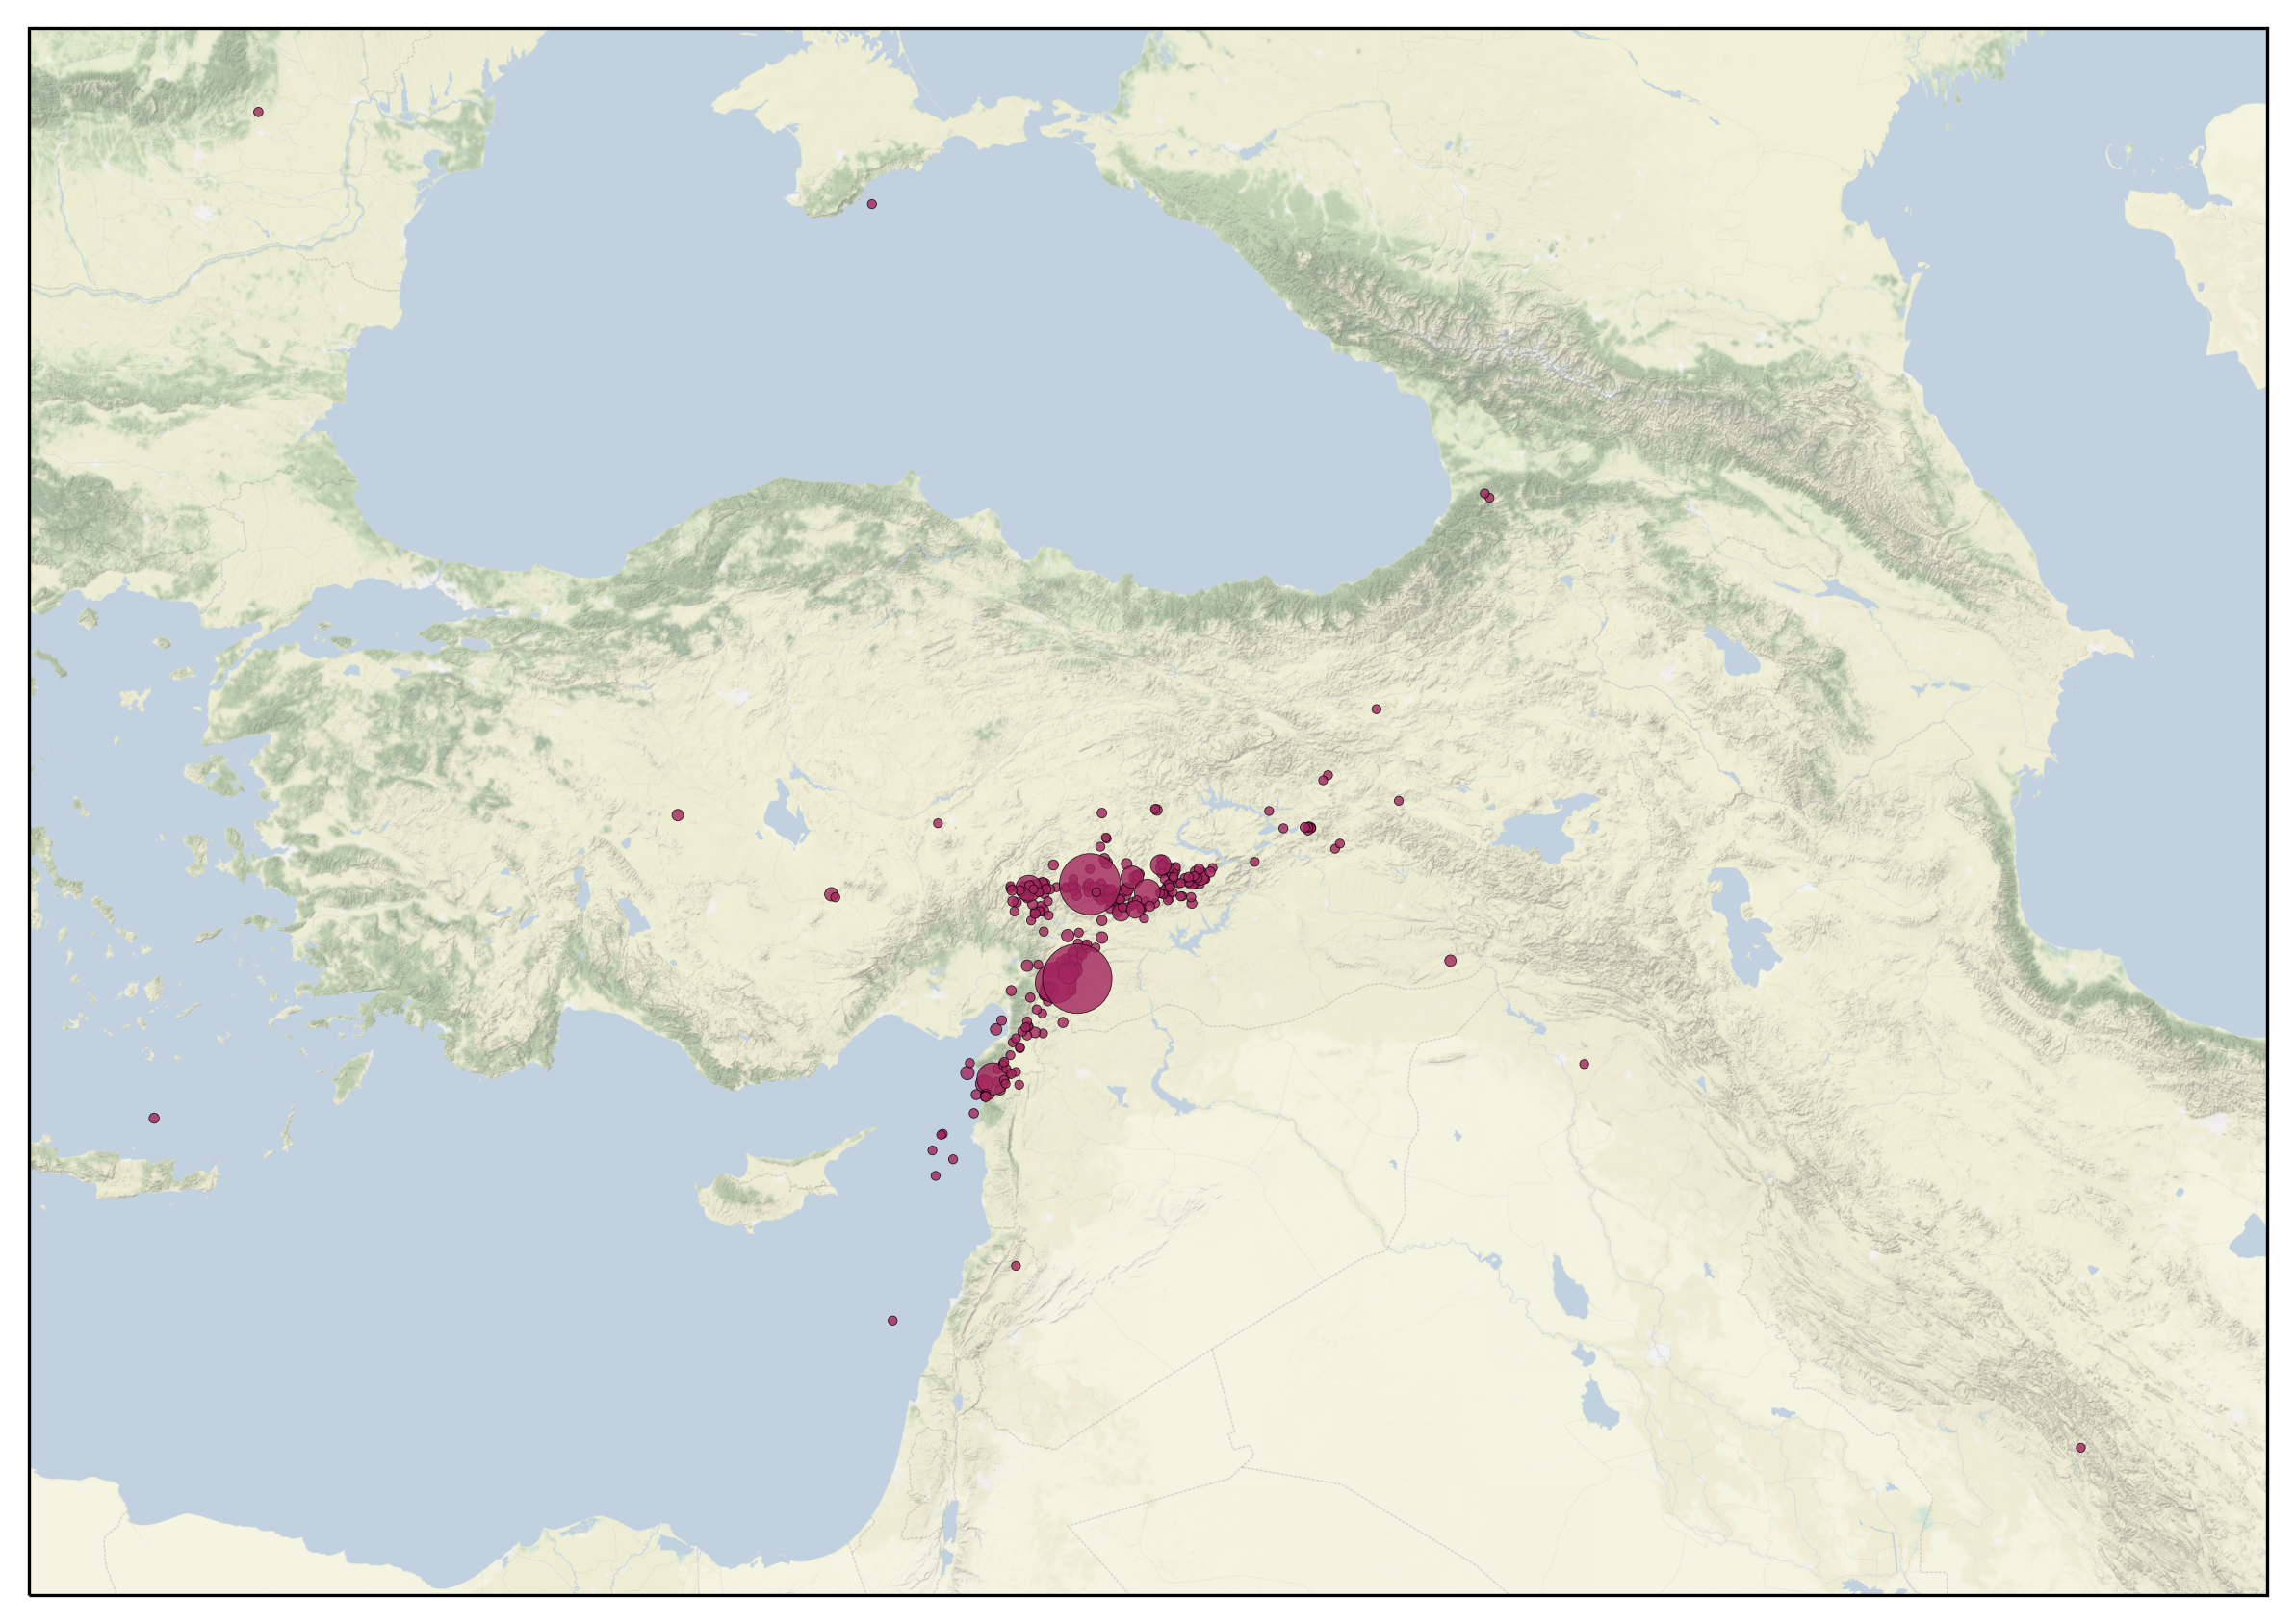

In [20]:
fig = plt.figure(figsize=(10, 10), linewidth=1)    
ax = plot_in_space(cat, resolution='50m')
fig.savefig("seismicity_turkey.pdf")

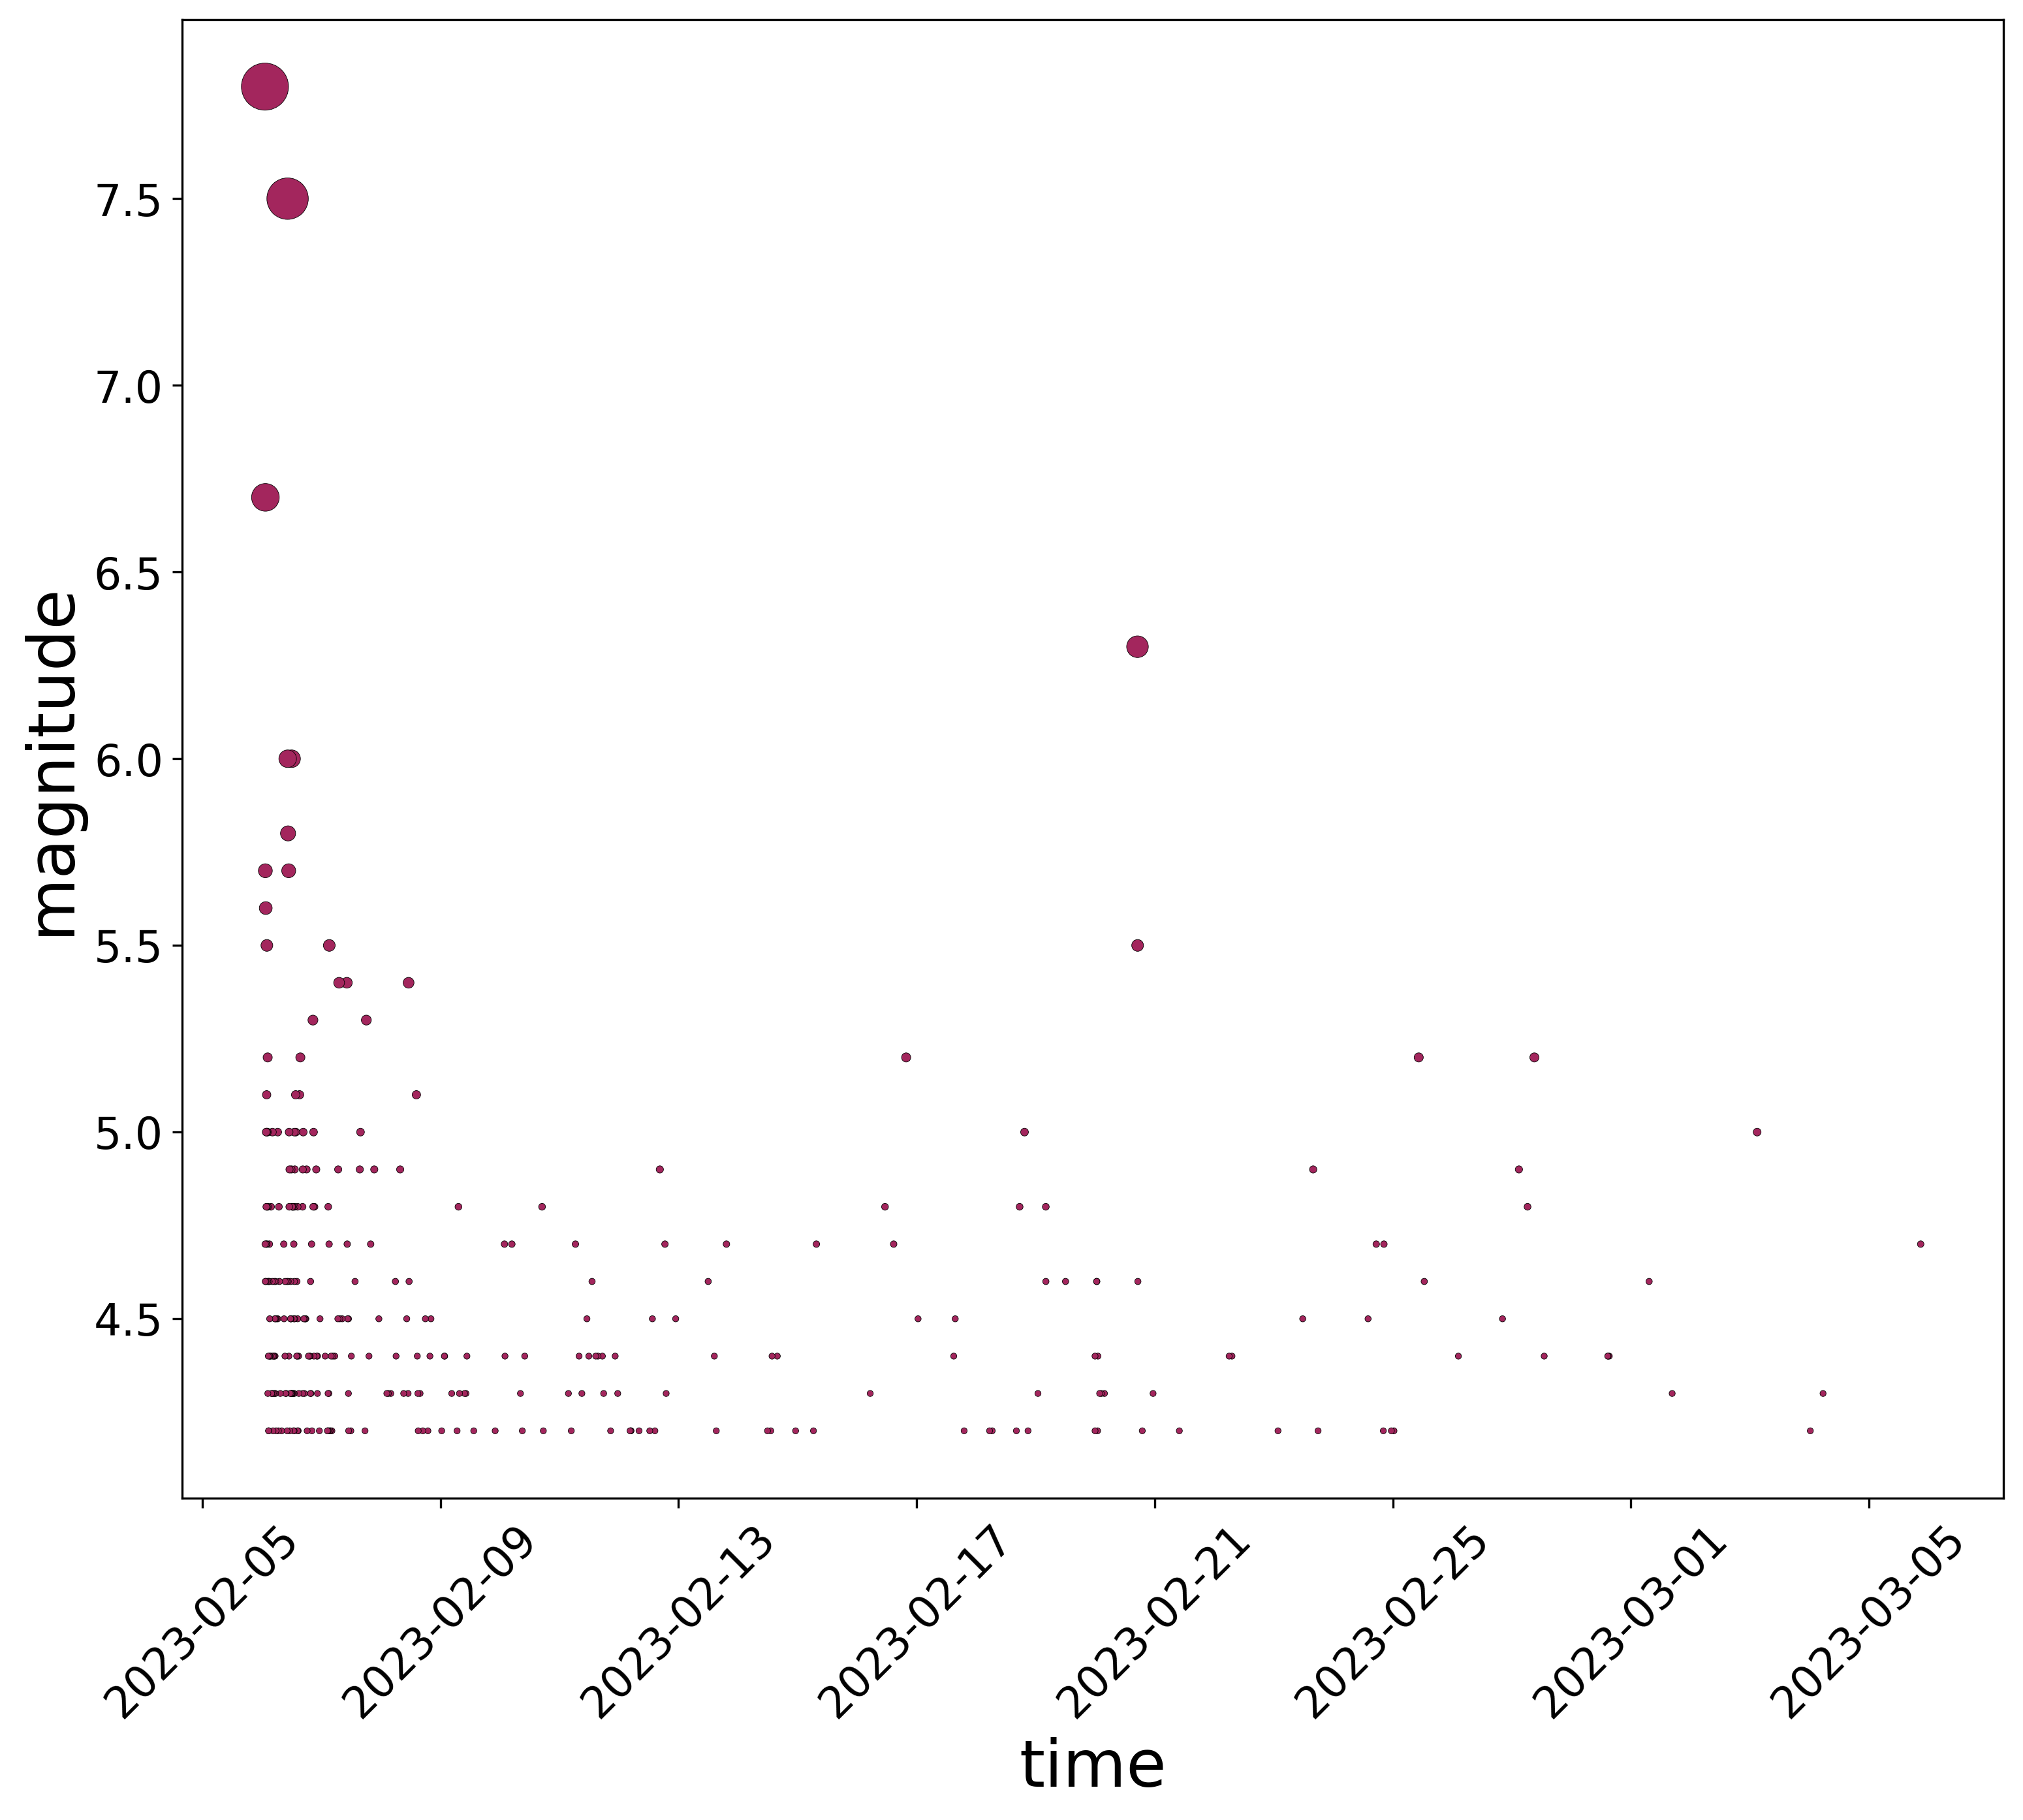

In [23]:
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(12,10))
plt.scatter(
        cat["time"],
        cat["magnitude"],
        #c='#2766cc',
        c='#a3265d',
        edgecolor='k',
        s=dot_size(np.array(cat["magnitude"]), interpolation_power=3, smallest=5, largest=300),
        zorder=100,
        linewidth=0.2, alpha=1
    )
plt.ylabel("magnitude", fontsize=24)
plt.xlabel("time",fontsize=24)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xticks(rotation = 45)
plt.savefig("through_time_turkey.png")

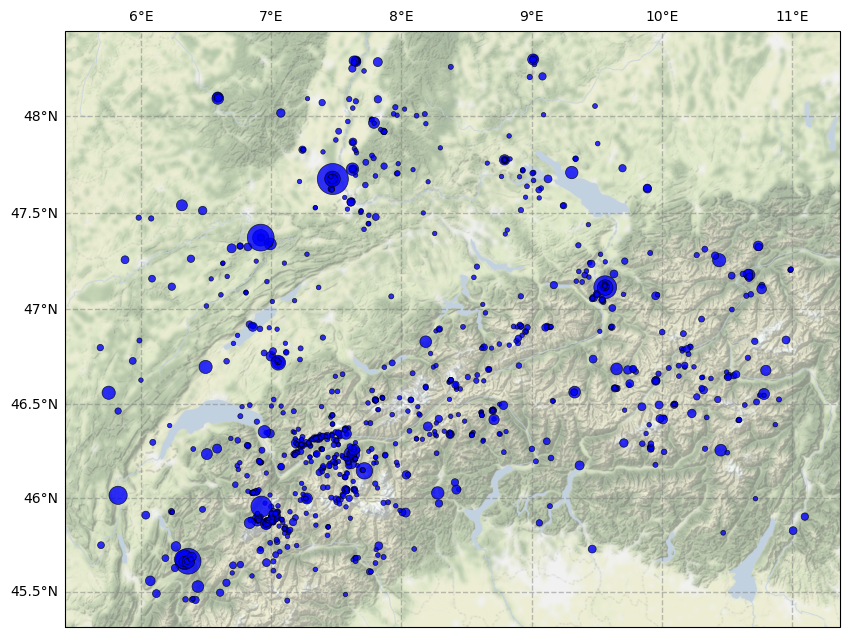

In [8]:
fig = plt.figure(figsize=(10, 10), linewidth=1)    
ax = plot_in_space(df, resolution='50m', include_map=True, dot_largest=500,
                   dot_interpolation_power=3)

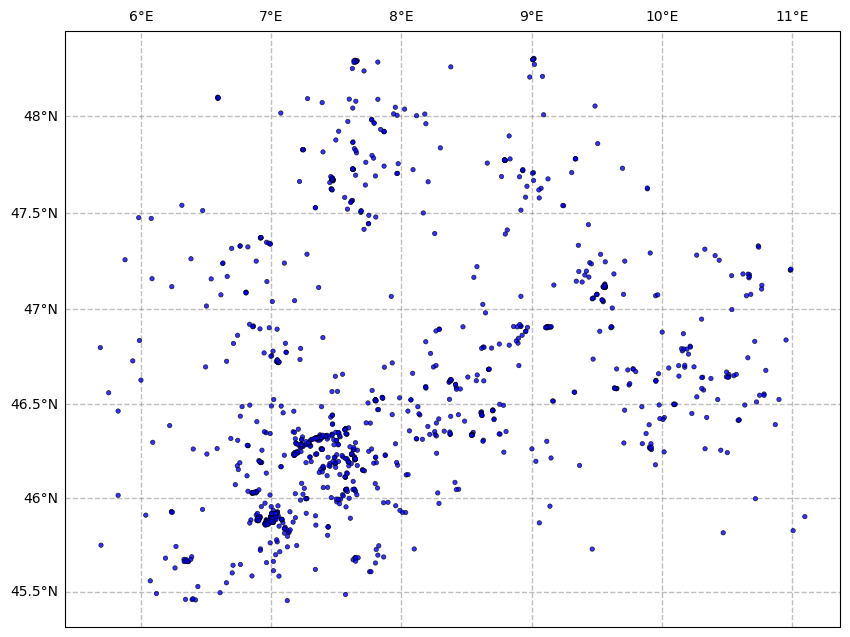

In [14]:
fig = plt.figure(figsize=(10, 10), linewidth=1)    
plot_in_space(cat, resolution='50m')

<AxesSubplot:xlabel='time', ylabel='count - cumulative'>

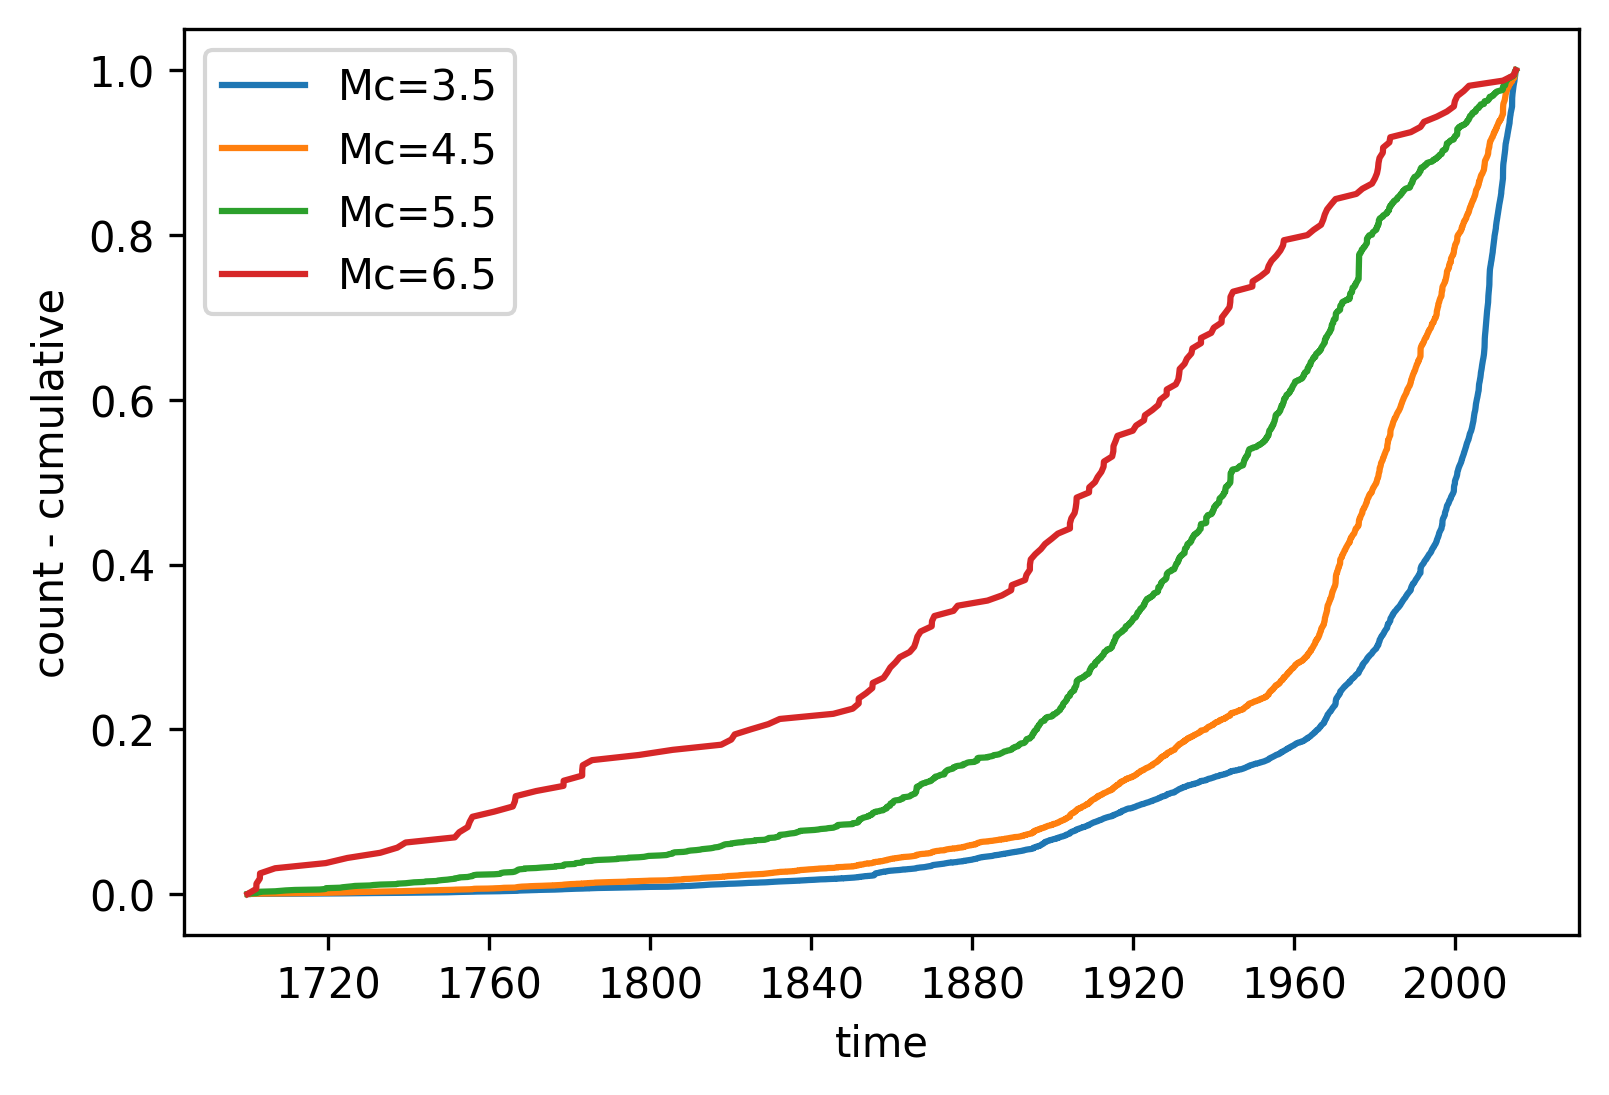

In [28]:
plot_cum_count(cat, mcs=np.array([3.5,4.5,5.5,6.5]))

In [ ]:
ax = plot_cum_count(df, mcs=np.arange(0.5, 4.0, 1), delta_m=0.1)

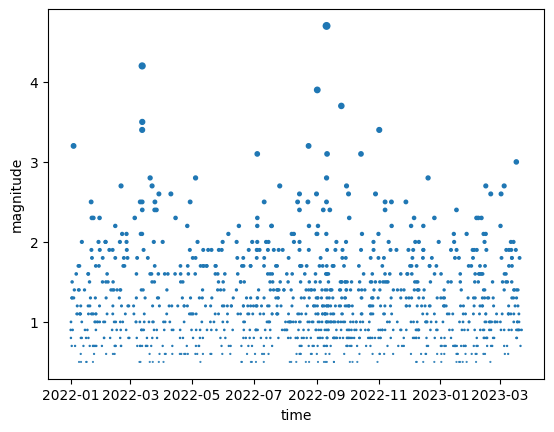

In [9]:
ax = plot_mags_in_time(df)

In [10]:
type(ax)

matplotlib.axes._axes.Axes

<Figure size 3600x3000 with 0 Axes>

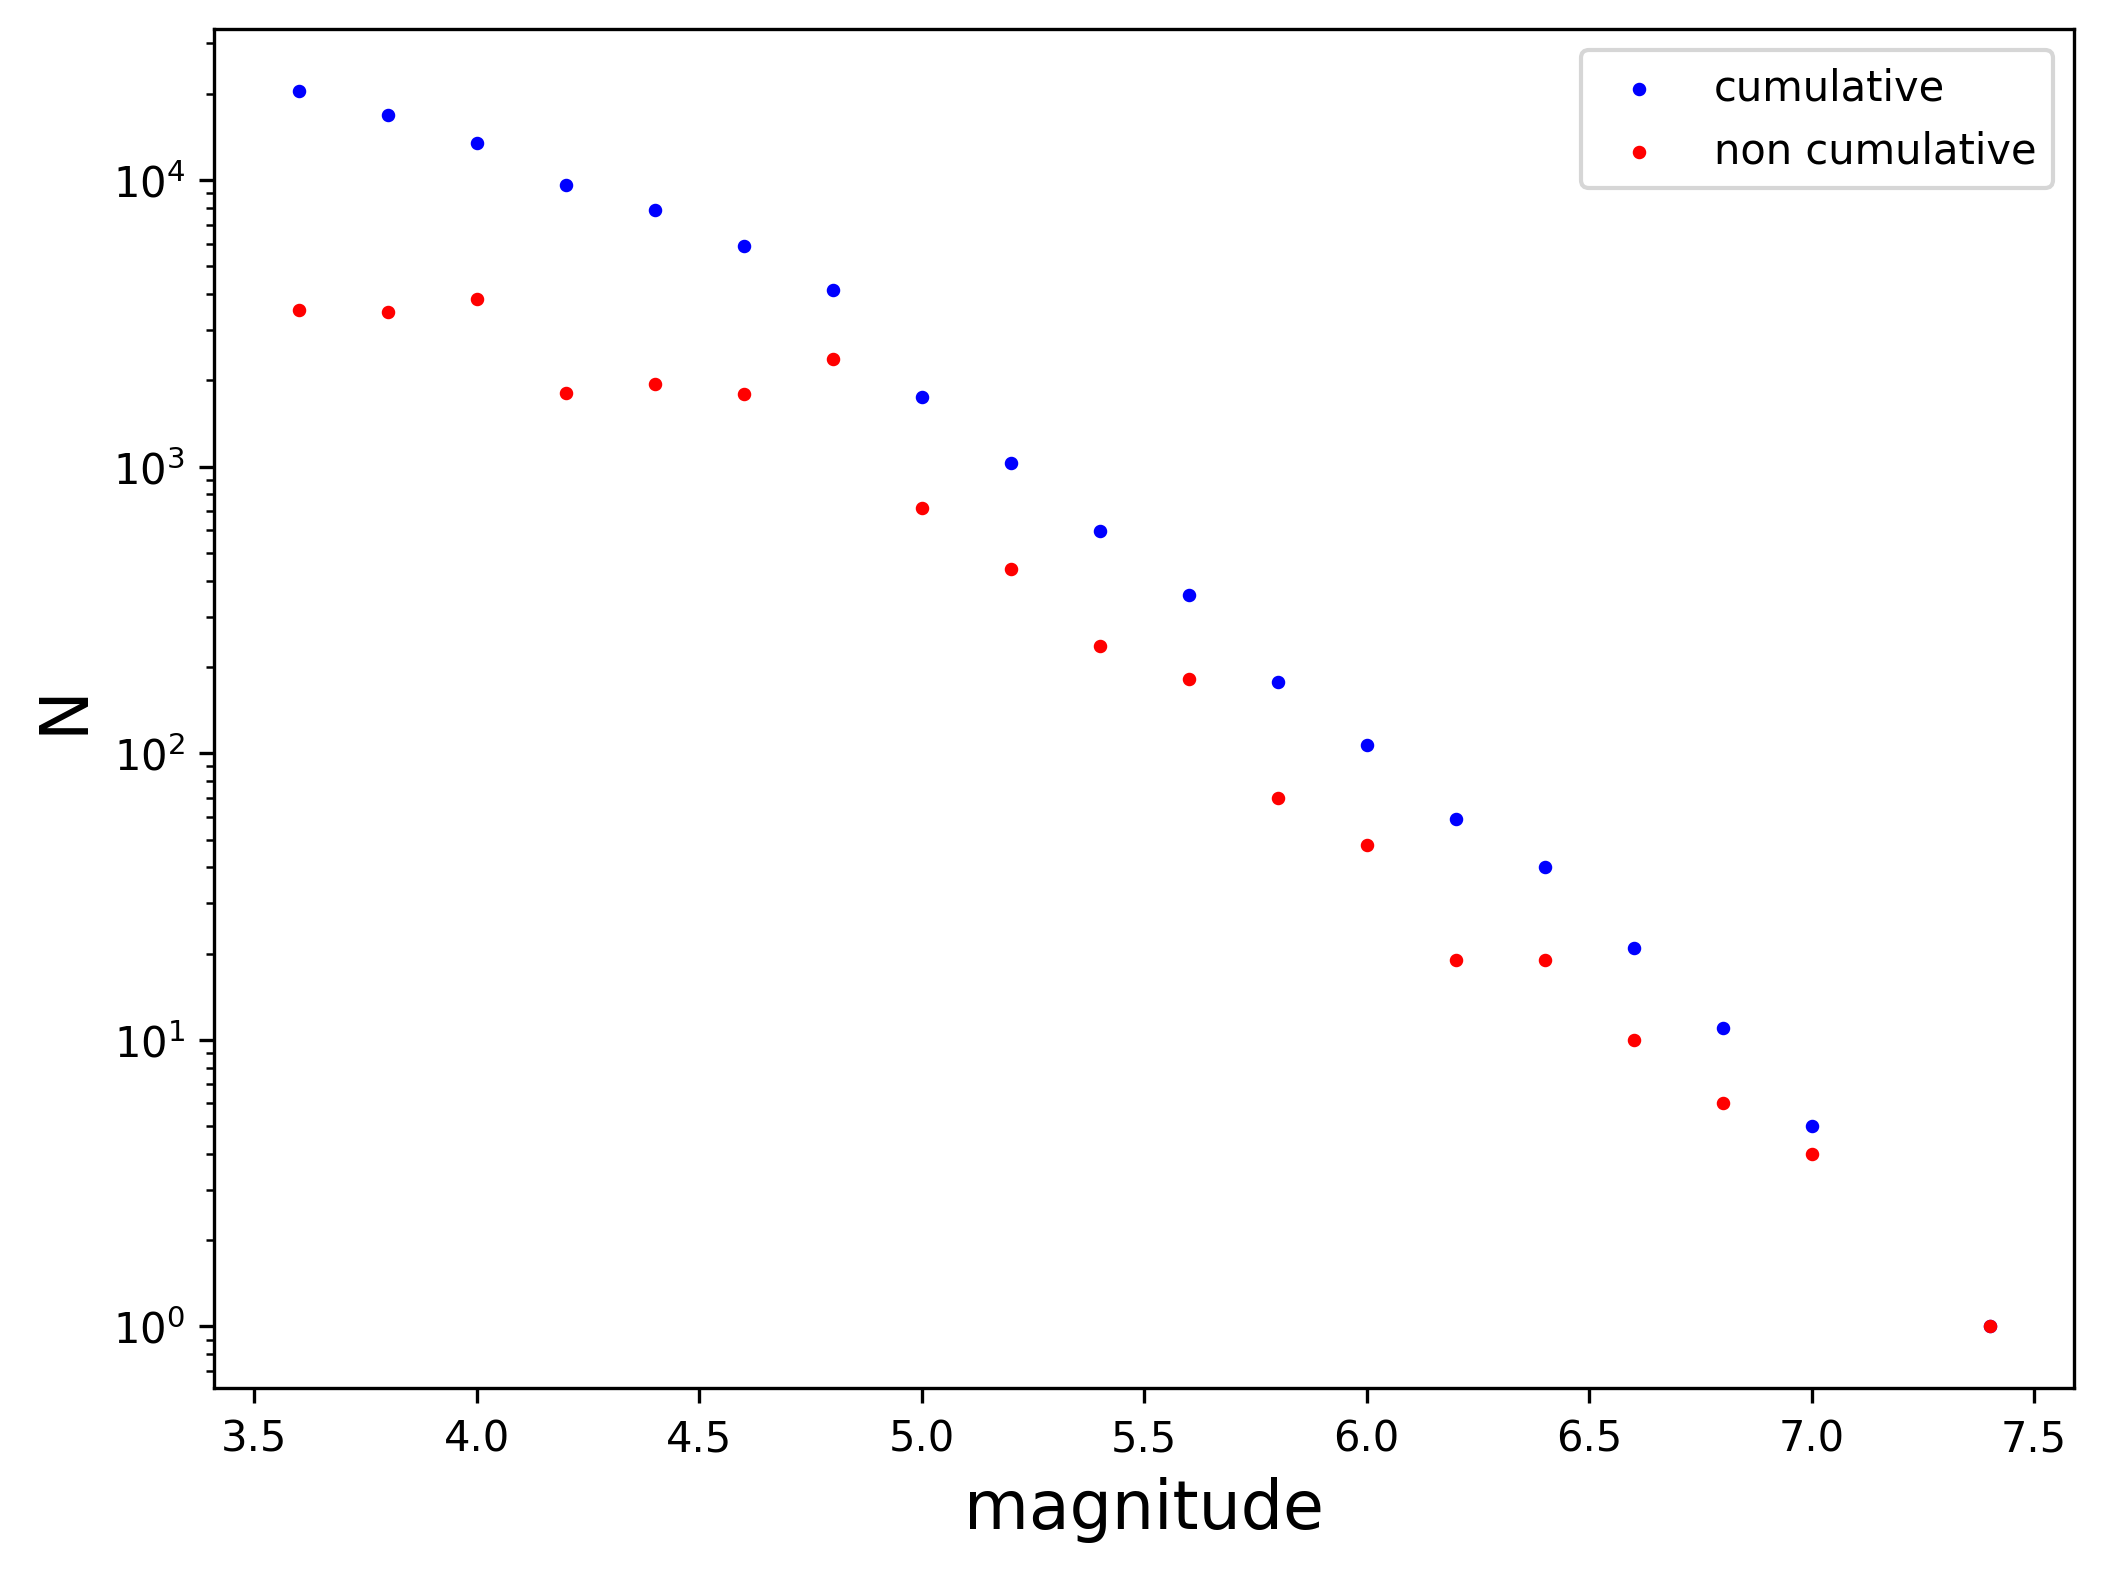

In [8]:
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(12,10))
ax = plt.subplots(figsize=(8, 6))[1]

plot_cum_fmd(cat['magnitude'], ax=ax, color='blue')
plot_fmd(cat['magnitude'], ax=ax, color='red')
plt.ylabel("N", fontsize=16)
plt.xlabel("magnitude",fontsize=16)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
ax.legend(['cumulative', 'non cumulative'])

## 2. Generate and bin synthetic earthquakes
<font color=#208de2> First we need to define the number of earthquakes, the b-value and the completeness magnitude. For the b-value, note that beta is defined as the natural logarithm equivalent of the b-value. </font>

In [10]:
from catalog_tools import simulate_magnitudes, bin_to_precision

In [ ]:
n = 200
b_value = 1
beta = b_value*np.log(10)
delta_m = 0.1
mc = 3
mc_generation = mc - delta_m / 2

<font color=#208de2> Now we can generate a synthetic magnitude distribution: </font>

In [12]:
mags = simulate_magnitudes(n,beta,mc_generation)

<font color=#208de2> In order to bin the magnitudes, we just need to define the step-size: </font>

In [13]:
mags_binned = bin_to_precision(mags, delta_m)

## 4. Calculate b-values
<font color=#208de2> We estimate the b-value from the binned sample. It is important to pass on the information of which binning (if any) is applied. Also, be cautious that beta is (as above) a factor of np.log(10) different to the b-value. </font>

In [14]:
from catalog_tools import estimate_beta_elst, estimate_beta_utsu, estimate_beta_tinti, estimate_beta_laplace

# Other b-value estimation methods:
# from catalog_tools import estimate_beta_elst, estimate_beta_tinti, estimate_beta_laplace

In [15]:
beta_estimate = estimate_beta_tinti(mags_binned, mc=mc, delta_m=delta_m)
# beta_estimate = estimate_beta_utsu(mags_binned,mc=mc, delta_m=delta_m)
# beta_estimate = estimate_beta_elst(mags_binned, delta_m=delta_m)
# beta_estimate = estimate_beta_laplace(mags_binned, delta_m=delta_m)

<font color=#208de2> We can plot the original and binned magnitudes and their respective b-value estimates now. Note that the data are offset by half the binning size so that the cumulative number is shown correctly. </font>

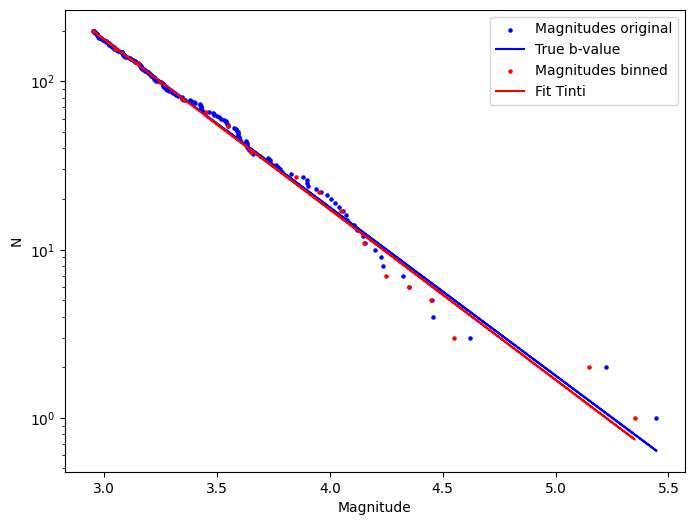

In [16]:
ax = plt.subplots(figsize=(8, 6))[1]

plot_cum_fmd(mags, ax=ax, b_value=b_value, mc=mc - delta_m/2, color='blue')
plot_cum_fmd(mags_binned,ax=ax, b_value=beta_estimate/np.log(10), delta_m=delta_m, color='red')

ax.legend(['Magnitudes original', 'True b-value', 'Magnitudes binned', 'Fit Tinti'])